In [1]:
#install kaggle
!pip install -q kaggle

In [2]:
#create a kaggle folder
! mkdir ~/.kaggle/

In [3]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 96% 411M/428M [00:02<00:00, 198MB/s]
100% 428M/428M [00:02<00:00, 169MB/s]


In [4]:
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [5]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from keras import utils

In [10]:
import os

paths = []
labels = []

for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
    for filename in filenames:
        # Append the full path of the file
        paths.append(os.path.join(dirname, filename))

        # Extract the label from the filename
        label = filename.split('_')[-1]  # Get the part after the last underscore
        label = label.split('.')[0]  # Remove the file extension
        labels.append(label.lower())  # Convert to lowercase

    # Stop after processing 2800 files
    if len(paths) == 2800:
        break

print('Dataset is loaded')


Dataset is loaded


In [11]:
len(paths)

2800

In [12]:
paths[:5]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_third_ps.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_boat_ps.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_dodge_ps.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_hash_ps.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_rain_ps.wav']

In [13]:
labels[:5]

['ps', 'ps', 'ps', 'ps', 'ps']

In [14]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()


,speech,label
0,/content/tess toronto emotional speech set dat...,ps
1,/content/tess toronto emotional speech set dat...,ps
2,/content/tess toronto emotional speech set dat...,ps
3,/content/tess toronto emotional speech set dat...,ps
4,/content/tess toronto emotional speech set dat...,ps


In [15]:
df['label'].value_counts()

,count
label,
ps,400
fear,400
happy,400
sad,400
disgust,400
neutral,400
angry,400


In [17]:
df['label_count']= df['label'].value_counts()

In [18]:
df.drop('label_count', axis = 1)

,speech,label
0,/content/tess toronto emotional speech set dat...,ps
1,/content/tess toronto emotional speech set dat...,ps
2,/content/tess toronto emotional speech set dat...,ps
3,/content/tess toronto emotional speech set dat...,ps
4,/content/tess toronto emotional speech set dat...,ps
...,...,...
2795,/content/tess toronto emotional speech set dat...,angry
2796,/content/tess toronto emotional speech set dat...,angry
2797,/content/tess toronto emotional speech set dat...,angry
2798,/content/tess toronto emotional speech set dat...,angry


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


<Axes: xlabel='label', ylabel='count'>

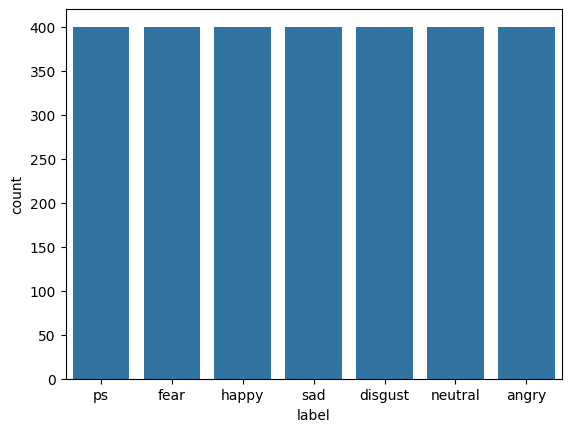

In [20]:
sns.countplot(data=df, x='label')

In [21]:
df

,speech,label,label_count
0,/content/tess toronto emotional speech set dat...,ps,NaN
1,/content/tess toronto emotional speech set dat...,ps,NaN
2,/content/tess toronto emotional speech set dat...,ps,NaN
3,/content/tess toronto emotional speech set dat...,ps,NaN
4,/content/tess toronto emotional speech set dat...,ps,NaN
...,...,...,...
2795,/content/tess toronto emotional speech set dat...,angry,NaN
2796,/content/tess toronto emotional speech set dat...,angry,NaN
2797,/content/tess toronto emotional speech set dat...,angry,NaN
2798,/content/tess toronto emotional speech set dat...,angry,NaN


In [22]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


In [24]:
df.drop('label_count', axis=1, inplace = True)

In [25]:
print(df.head())
print(df['label'].unique())

                                              speech label
0  /content/tess toronto emotional speech set dat...    ps
1  /content/tess toronto emotional speech set dat...    ps
2  /content/tess toronto emotional speech set dat...    ps
3  /content/tess toronto emotional speech set dat...    ps
4  /content/tess toronto emotional speech set dat...    ps
['ps' 'fear' 'happy' 'sad' 'disgust' 'neutral' 'angry']


In [26]:
df['speech'].unique()

array(['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_third_ps.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_boat_ps.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_dodge_ps.wav',
       ...,
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_late_angry.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_sub_angry.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_boat_angry.wav'],
      dtype=object)

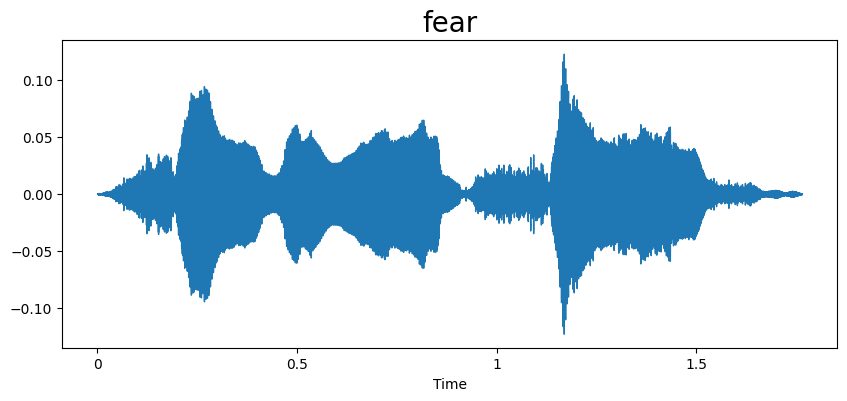

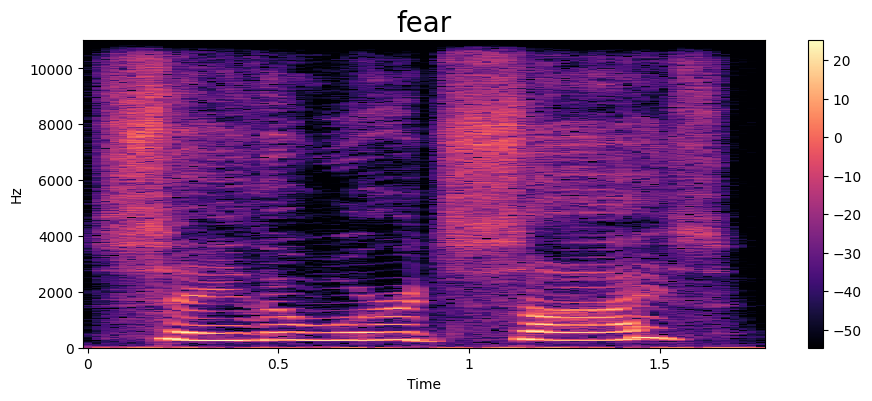

In [27]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


In [28]:
emotion = 'angry'

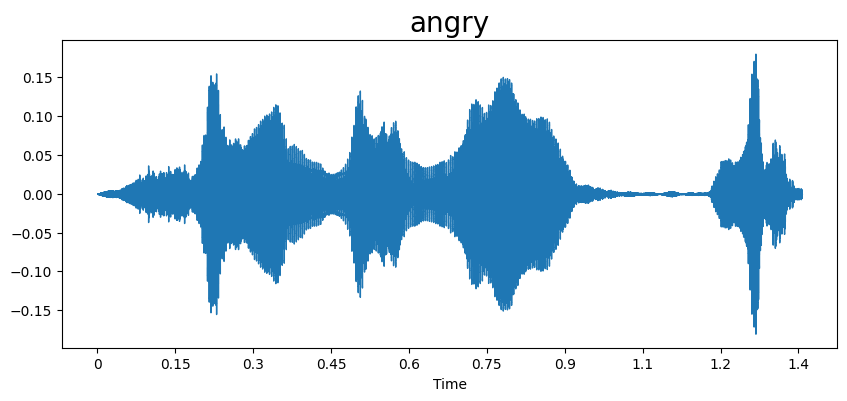

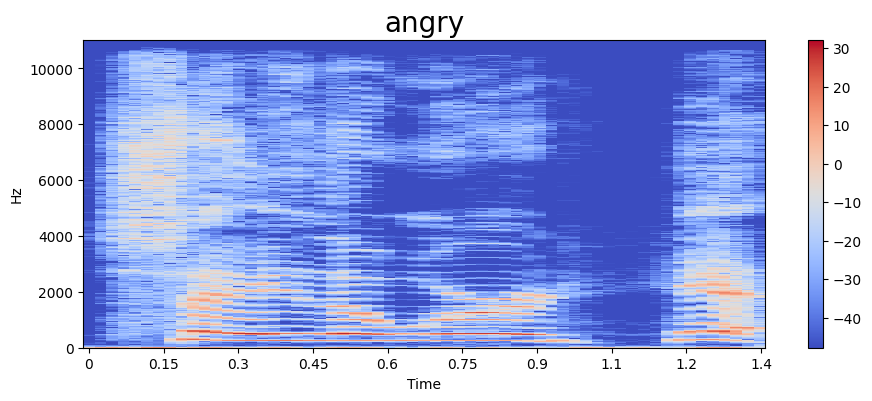

In [29]:
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


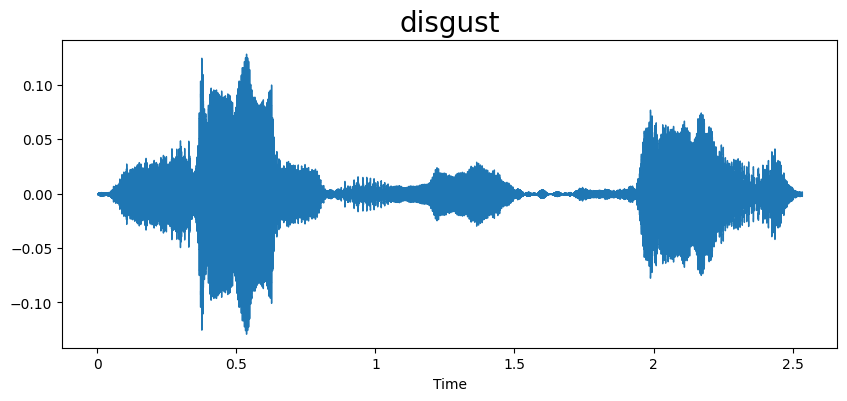

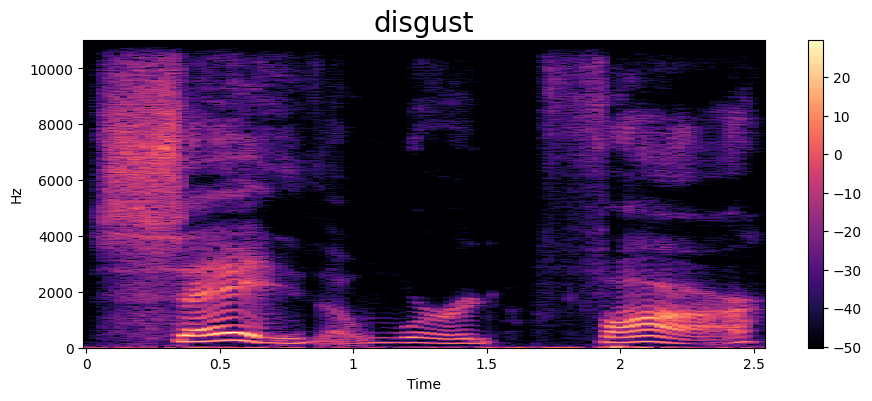

In [30]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


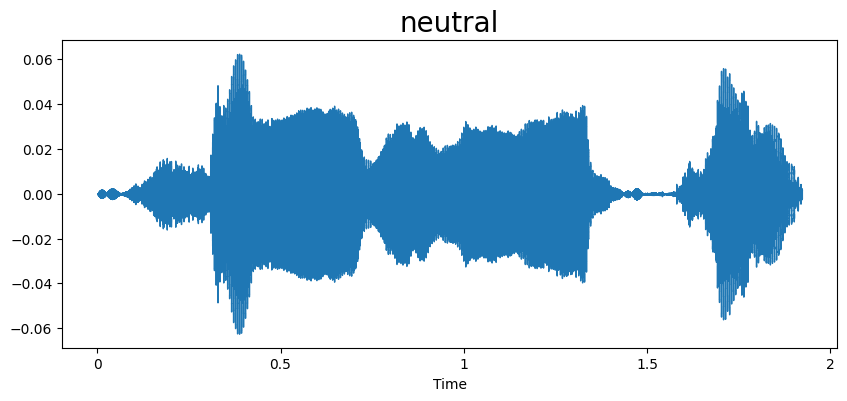

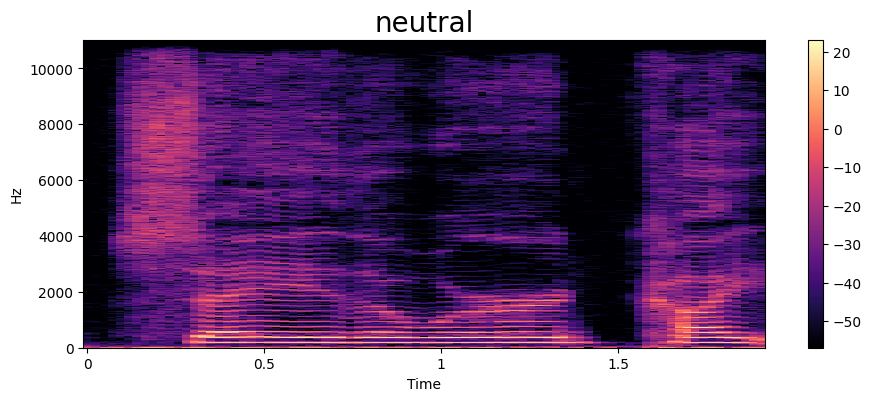

In [31]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


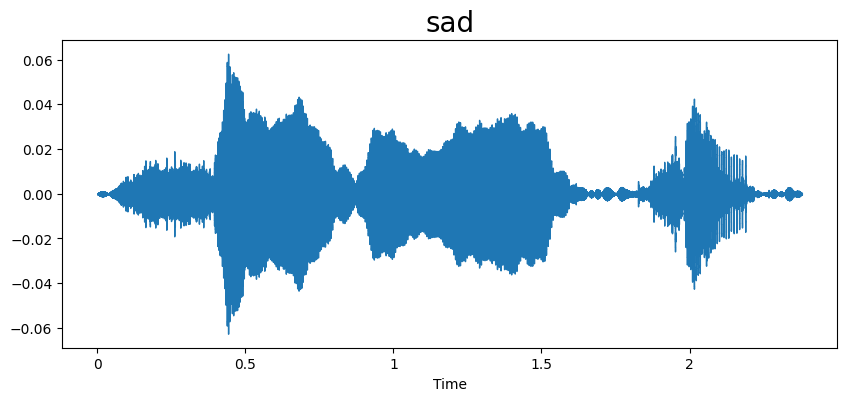

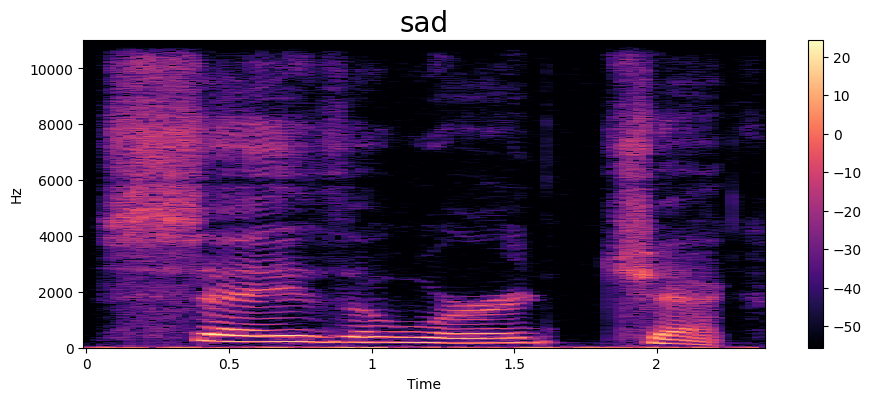

In [32]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


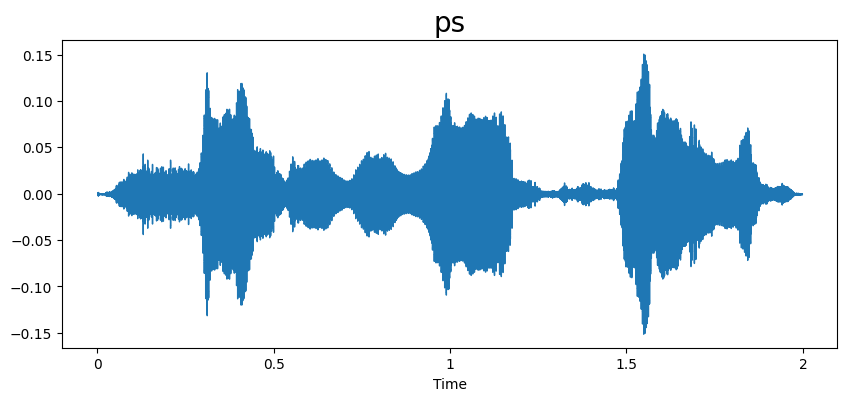

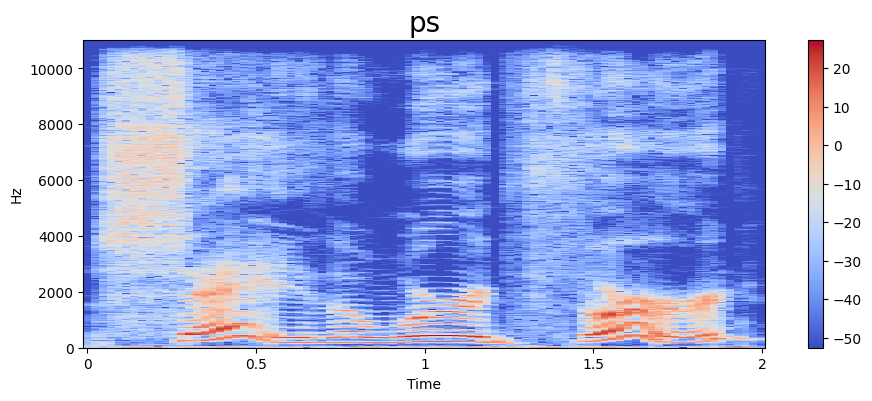

In [33]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


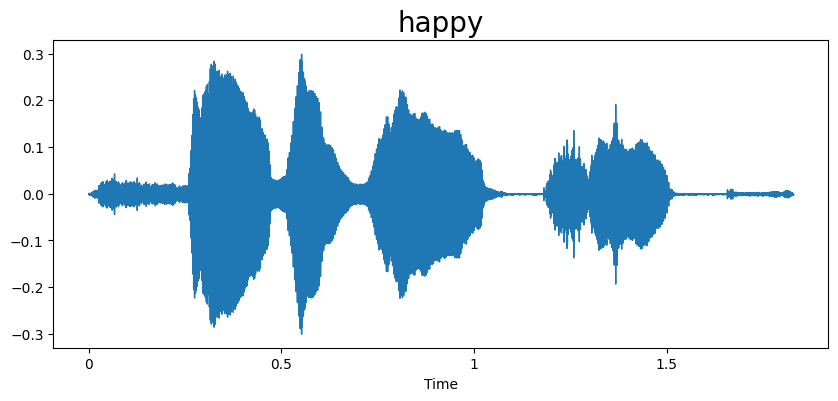

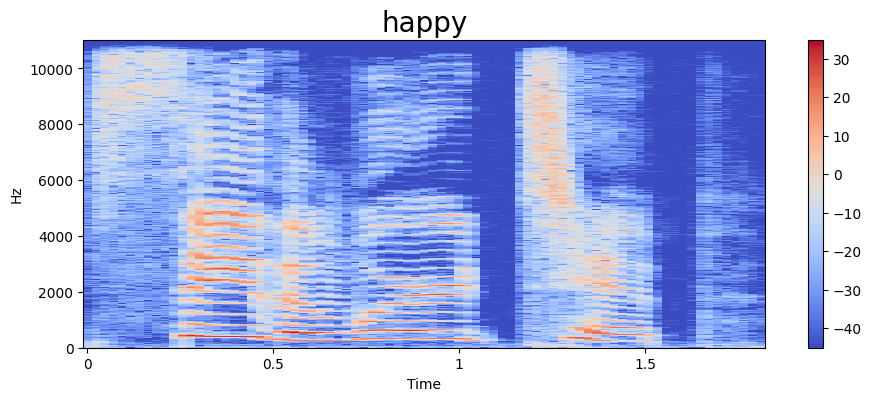

In [35]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


In [36]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc


In [37]:
extract_mfcc(df['speech'][0])

array([-4.41835510e+02,  1.11251320e+02,  1.31647577e+01, -3.48225098e+01,
        1.04642429e+01,  7.65692902e+00, -1.69377613e+01, -1.45766106e+01,
       -1.81218052e+01, -1.06235170e+00, -2.26677742e+01, -6.78643084e+00,
       -4.51744080e+00, -5.34471941e+00, -3.76795501e-01,  8.94247651e-01,
        9.79347825e-01,  1.18102989e+01,  2.64161158e+00, -5.95613480e-01,
        5.00193715e-01,  3.63190389e+00, -4.66626453e+00,  5.90995598e+00,
       -6.33682823e+00,  5.84294224e+00, -6.05019140e+00,  7.25089645e+00,
       -5.04784775e+00,  6.47311020e+00,  4.27318990e-01,  1.06886683e+01,
        1.22499161e+01,  8.55145073e+00,  1.24270267e+01,  1.21654406e+01,
        1.32146015e+01,  1.46062775e+01,  1.03210115e+01,  1.08426104e+01],
      dtype=float32)

In [38]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [39]:
X_mfcc

,speech
0,"[-441.8355, 111.25132, 13.164758, -34.82251, 1..."
1,"[-496.56116, 117.238655, 21.471125, 1.8774668,..."
2,"[-429.57617, 96.84065, 10.537672, -11.502708, ..."
3,"[-476.07047, 120.36238, -23.18892, -4.1534038,..."
4,"[-417.7034, 110.75616, 2.8642013, -18.923342, ..."
...,...
2795,"[-335.12985, 30.14752, 0.06873559, 13.134081, ..."
2796,"[-389.04993, 90.45158, 5.151683, 44.672207, 0...."
2797,"[-322.15805, 43.490833, -5.3218946, 9.012743, ..."
2798,"[-324.36246, 55.675537, -4.9687376, 1.275695, ..."


In [40]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape


(2800, 40)

In [41]:
## input split
X = np.expand_dims(X, -1)
X.shape


(2800, 40, 1)

In [42]:
## input split
X = np.expand_dims(X, -1)
X.shape


(2800, 40, 1, 1)

In [43]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])


In [44]:
y = y.toarray()

In [45]:
y.shape

(2800, 7)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Create the LSTM Model

In [47]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40, 1)),
    Dropout(0.5),  # Add dropout after LSTM layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout after dense layer
    Dense(64, activation='relu'),
    Dropout(0.5),  # Add dropout after dense layer
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
Model: "sequential"


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
#Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=64)


Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 226ms/step - accuracy: 0.2754 - loss: 1.8264 - val_accuracy: 0.6821 - val_loss: 1.0166
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 262ms/step - accuracy: 0.5406 - loss: 1.1724 - val_accuracy: 0.7536 - val_loss: 0.7142
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 161ms/step - accuracy: 0.7001 - loss: 0.7820 - val_accuracy: 0.8554 - val_loss: 0.4361
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 13s 248ms/step - accuracy: 0.7973 - loss: 0.5847 - val_accuracy: 0.9304 - val_loss: 0.2076
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 192ms/step - accuracy: 0.8377 - loss: 0.4727 - val_accuracy: 0.9464 - val_loss: 0.1722
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 238ms/step - accuracy: 0.9073 - loss: 0.3016 - val_accuracy: 0.9625 - val_loss: 0.1424
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 161ms/step - accuracy: 0.9142 - loss: 0.2884 - val_accuracy: 0.9464 - val_loss: 0.1500
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 188ms/step - accuracy: 0.9269 - loss: 0.2347 - val_accuracy:

Plot the results

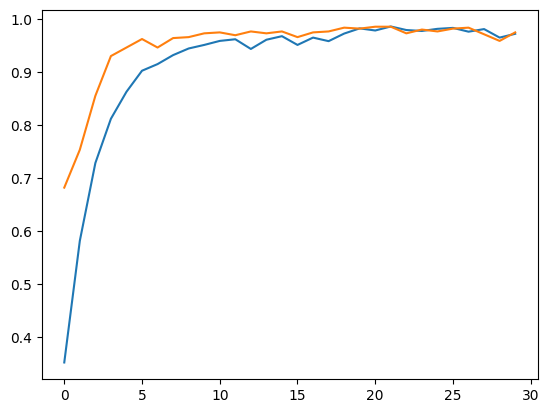

In [49]:
epochs = list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')

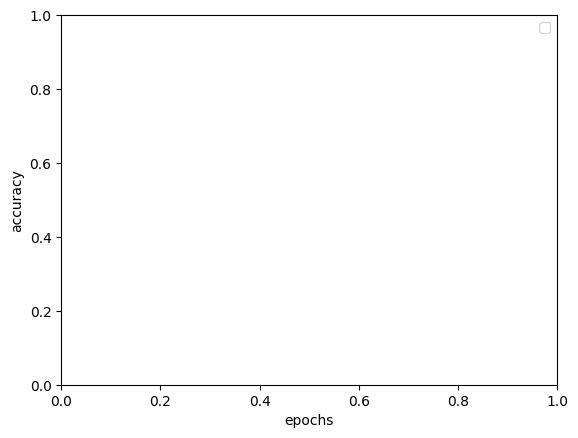

In [50]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


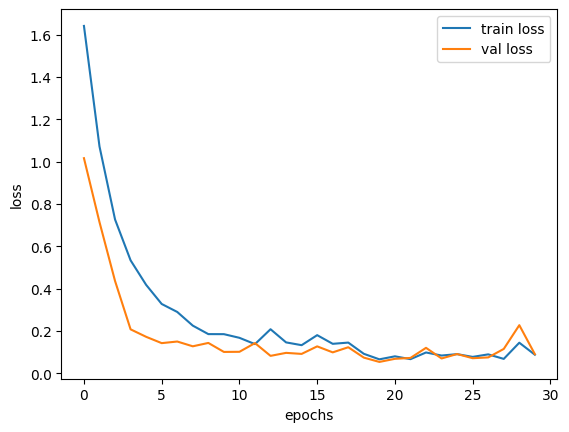

In [51]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [52]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


In [54]:
from sklearn.metrics import confusion_matrix, classification_report

In [55]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[75  0  1  0  0  0  0]
 [ 1 76  0  0  0  0  2]
 [ 0  0 77  1  0  0  0]
 [ 0  0  0 91  0  1  0]
 [ 0  0  0  0 74  0  0]
 [ 1  2  0  5  0 69  0]
 [ 0  0  0  0  0  0 84]]


In [56]:
#Print the classification report
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']
print("Classification Report:")
print(classification_report(y_val_classes, y_pred_classes, target_names=target_names))


Classification Report:
              precision    recall  f1-score   support

       angry       0.97      0.99      0.98        76
     disgust       0.97      0.96      0.97        79
        fear       0.99      0.99      0.99        78
       happy       0.94      0.99      0.96        92
     neutral       1.00      1.00      1.00        74
          ps       0.99      0.90      0.94        77
         sad       0.98      1.00      0.99        84

    accuracy                           0.97       560
   macro avg       0.98      0.97      0.98       560
weighted avg       0.98      0.97      0.97       560



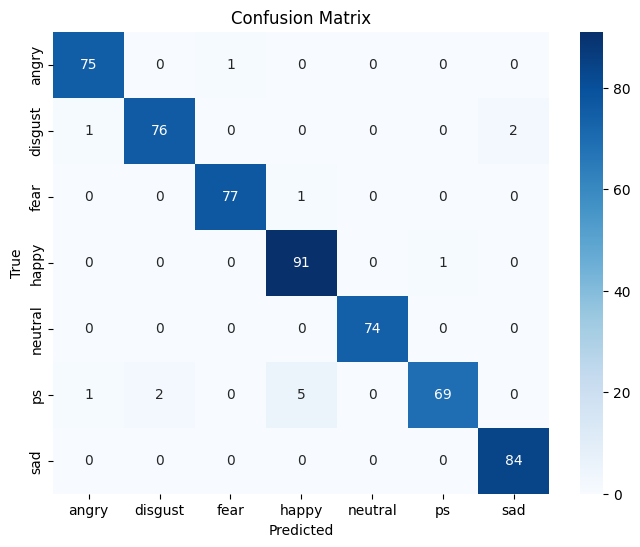

In [57]:
#Correlation HeatMap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
